In [1]:
# Bunch of imports
import numpy as np
import numpy.polynomial.polynomial as n_poly
import numpy.polynomial.legendre as leg
from scipy import integrate
from scipy import optimize
from scipy import interpolate
import sympy as sym
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [8]:
# Set the interval for L2 and the number of basis functions
A=-1.
B=1.
N=10

In [9]:
# Define the scalar product in L2([A,B])
t = sym.symbols('t')

def scalar_product(p0, p1):
#     tt = p0.free_symbols.pop()
    foo1 = sym.lambdify(t, p0, 'numpy')
    foo2 = sym.lambdify(t, p1, 'numpy')
    foo3 = lambda x : foo1(x)*foo2(x)
    foo = integrate.quad(foo3,A,B)
    return foo[0]


this is the leg.legval(xx,c)


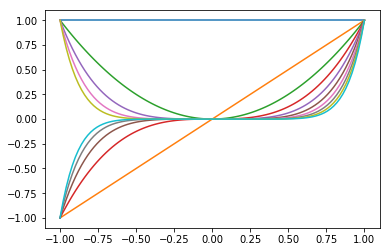

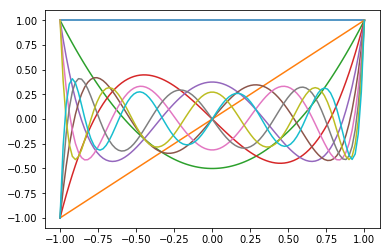

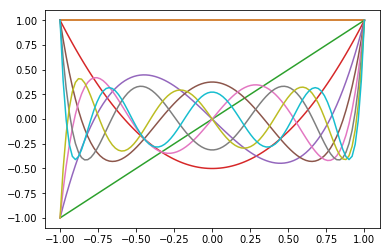

In [10]:
# Derive and plot the Legendre polynomials
PLk = [1.+0.*t]
PMk = [1.+0.*t]

for k in range(1,N):
    s = 0.
    for j in range(k):
        s+= scalar_product(t**k,PLk[j])/scalar_product(PLk[j],PLk[j])*PLk[j]
    pk = t**k - s
    #print("info")
    #print("pk")
    #print(pk)
    # pr
    #print(pk.subs(t,B))
    pk = pk/pk.subs(t,B)
    PLk.append(pk)
    PMk.append(t**k)
    
xx = np.linspace(A,B,100)


print("the first one is xx,PMk[k] for k in 1,N")
print("PMk = t**k")

figure()
fs = sym.lambdify(t, PMk[0], 'numpy')
plot(xx, np.ones(xx.shape)*fs(xx))
for k in range(1,N):
    fs = sym.lambdify(t, PMk[k], 'numpy')
    plot(xx, fs(xx))
    

print("the second is xx,PLk[k] for k in 1,N")
print("PLk[k] = orthogonal legendre poly of order k")
figure()
plot(xx, np.ones(xx.shape))
for k in range(1,N):
    fs = sym.lambdify(t, PLk[k], 'numpy')
    plot(xx, fs(xx))

print('the third is given by xx,leg.legval(xx,c)')
figure()
for k in range(N):
    c = np.zeros(k)
    if(k==0):
        c=1
    else:
        c[-1]=1
    plot(xx, leg.legval(xx, c))

In [ ]:
#Best Approximation in L2([A,B]) using different basis
f = sym.cos(8.*np.pi/(B-A)*t)

M_LP = np.zeros([N,N])

M_MP = np.zeros([N,N])

f_M = np.zeros([N,1])

f_L = np.zeros([N,1])

for i in range(N):
    f_M[i] = scalar_product(PMk[i],f)
    f_L[i] = scalar_product(PLk[i],f)
    for j in range(N):
        M_LP[i,j] = scalar_product(PLk[i],PLk[j])
        M_MP[i,j] = scalar_product(PMk[i],PMk[j])
        
p_L = np.linalg.solve(M_LP, f_L)
p_M = np.linalg.solve(M_MP, f_M)

f_p_L = 0.
f_p_M = 0.

for i in range(N):
    f_p_L += p_L[i] * PLk[i]
    f_p_M += p_M[i] * PMk[i]

fpL = sym.lambdify(t, f_p_L[0], 'numpy')
fpM = sym.lambdify(t, f_p_M[0], 'numpy')

ff = sym.lambdify(t, f, 'numpy')

plot(xx, ff(xx), 'r*')
plot(xx, fpL(xx), 'b')
plot(xx, fpM(xx), 'g')
# See the condition numbers of the Mass Matrix
print(np.linalg.cond(M_LP))
print(np.linalg.cond(M_MP))

In [ ]:
# Verify Optimality
N_lagrange = N
x_interp = np.linspace(A,B,N_lagrange)
x_cheby = np.array([np.cos((2.*j-1)/(2.*N_lagrange)*np.pi) for j in range(1,N_lagrange + 1)])
lagrange_interp = interpolate.lagrange(x_interp, ff(x_interp))
cheb_interp = interpolate.lagrange(x_cheby, ff(x_cheby))

figure()
plot(xx, lagrange_interp(xx))
figure()
plot(xx, cheb_interp(xx))

lagrange_error = integrate.quad(lambda x : (ff(x)-lagrange_interp(x))**2, A,B)

cheb_error = integrate.quad(lambda x : (ff(x)-cheb_interp(x))**2, A,B)

fpM_error = integrate.quad(lambda x : (ff(x)-fpM(x))**2, A,B)

fpL_error = integrate.quad(lambda x : (ff(x)-fpL(x))**2, A,B)

In [ ]:
print lagrange_error
print cheb_error
print fpL_error
print fpM_error

In [ ]:
# Roots of Legendre polynomial

fs = sym.lambdify(t, PLk[8], 'numpy')
x0 = np.linspace(A,B,8)
roots = optimize.fsolve(fs, x0)
print(roots)
plot(xx, fs(xx))

x0[1] = -0.85
x0[-2] = 0.85
roots = optimize.fsolve(fs, x0)
print(roots)

c = np.zeros(8+1)
c[-1] = 1
print(leg.legroots(c))

xg, wg = leg.leggauss(8)

print(xg)

In [ ]:
# Gauss Integration
f_gauss = lambda x : 8.*np.sin(x)+3.*np.cos(15.*x)

I = integrate.quad(f_gauss,A,B)

n_gauss = 10

xg, wg = leg.leggauss(n_gauss)

In = np.dot(wg, f_gauss(xg))

print(I)
print(In)

# Integration Error

error = list()

Ngmax = 40
order = np.arange(1,Ngmax)
for i in order:
    xg, wg = leg.leggauss(i)
#     In = np.dot(wg, f_gauss(xg))
    In = np.einsum('j,j',wg,f_gauss(xg))
    error.append(np.abs(I[0]-In))

plot(order, error)
figure()
loglog(order,error)
loglog(order, np.ones(Ngmax-1)*I[1])
figure()
semilogy(order,error)
semilogy(order, np.ones(Ngmax-1)*I[1])
## REMARK QUADRATURE ORDER ON (f, vi) FOR BEST APPROXIMATION